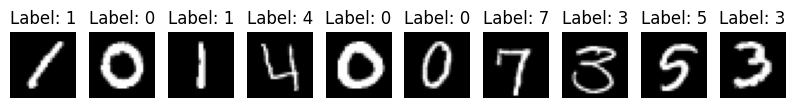

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Посмотрели, что находится в наших файлах
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Извлекли пиксельное значение из данных - т.е массив от 0 до 783 для каждого значения
pixels = train_data.loc[:, 'pixel0':'pixel783'].values
# Хотим получить первые 10 изображений
n = 10

images = pixels[:n].reshape(-1, 28, 28)

# Отображение изображений
fig, axes = plt.subplots(1, n, figsize=(10, 3))
for i in range(n):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_data.loc[i, 'label']}")
    
plt.show()

In [3]:
# Разделение данных на обучающий и проверочный наборы
train_images = train_data.loc[:, 'pixel0':'pixel783'].values
train_labels = train_data['label'].values

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [5]:
train_images[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 255, 253,  72,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73, 237, 253,
       231,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73, 232,
       252, 253, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
# Библиотека для открытия, изменения и сохранения множества различных форматов изображений.
from PIL import Image

# Reshape the image arrays
train_images_reshaped = train_images.reshape(-1, 28, 28)
val_images_reshaped = val_images.reshape(-1, 28, 28)

# Convert the image arrays to uint8 datatype
train_images_uint8 = train_images_reshaped.astype(np.uint8)
val_images_uint8 = val_images_reshaped.astype(np.uint8)

# Resize the images
width = 28
height = 28
train_images_resized = [Image.fromarray(image).resize((width, height)) for image in train_images_uint8]
val_images_resized = [Image.fromarray(image).resize((width, height)) for image in val_images_uint8]

In [8]:
# Посмотреть изображение
train_images_resized[6].show()

In [9]:
# Создаём модель нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2024-03-25 13:29:58.982745: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 13:29:58.984332: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 13:29:59.003786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 13:29:59.003803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 13:29:59.004439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [ ]:
# Задание параметров обучения
epochs = 100
batch_size = 32

# Обучение модели
model.fit(np.array(train_images_reshaped), train_labels, epochs=epochs, 
          batch_size=batch_size, validation_data=(np.array(val_images_reshaped), val_labels))


Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9812 - val_loss: 0.0948
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9956 - loss: 0.0125 - val_accuracy: 0.9838 - val_loss: 0.0982
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9949 - loss: 0.0178 - val_accuracy: 0.9814 - val_loss: 0.1047
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9850 - val_loss: 0.1034
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9938 - loss: 0.0228 - val_accuracy: 0.9830 - val_loss: 0.0941
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9825 - val_loss: 0.1052
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9965 - loss: 0.0122 - val_accuracy: 0.9844 - val_loss: 0.1087
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9970 - loss: 0

In [11]:
# Оценка модели на проверочном наборе данных
_, accuracy = model.evaluate(np.array(val_images_reshaped), val_labels)
print('Validation Accuracy: %.2f' % (accuracy * 100))

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9779 - loss: 0.1250
Validation Accuracy: 97.81


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


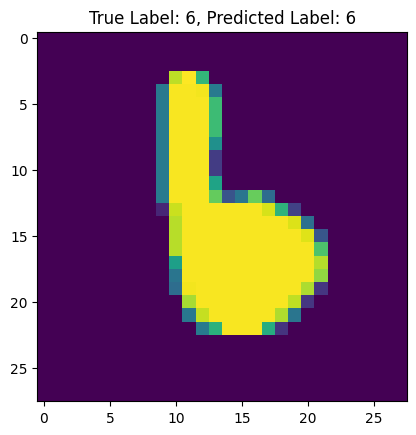

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


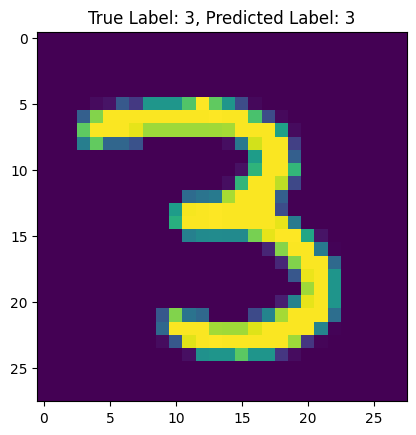

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


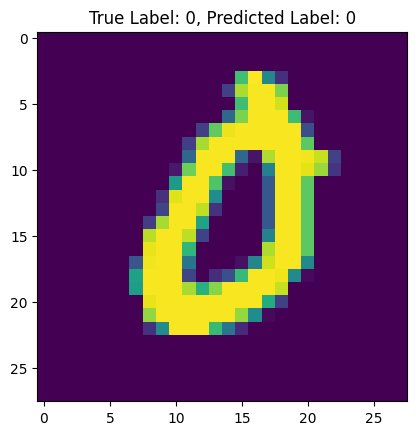

In [17]:
import matplotlib.pyplot as plt

# Выбор случайных индексов для отображения
random_indexes = [10, 20, 30]

for index in random_indexes:
    # Получение изображения и метки
    image = val_images_reshaped[index]
    label = val_labels[index]

    # Предсказание метки для изображения
    prediction = model.predict(np.array([image]))
    predicted_label = np.argmax(prediction)

    # Отображение изображения
    plt.imshow(image)
    plt.title(f'True Label: {label}, Predicted Label: {predicted_label}')
    plt.show()


In [18]:
# Извлечение пиксельных значений из данных тестовых изображений
test_pixels = test_data.loc[:, 'pixel0':'pixel783'].values

# Преобразование размера тестовых изображений
test_images_reshaped = test_pixels.reshape(-1, 28, 28)

# Предсказание на тестовых данных
predictions = model.predict(test_images_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


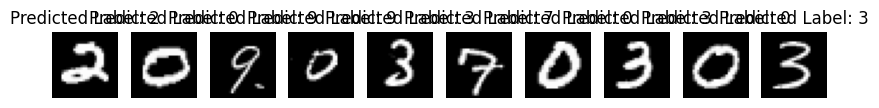

In [19]:
n = 10  # Количество изображений для отображения

fig, axes = plt.subplots(1, n, figsize=(10, 3))
for i in range(n):
    axes[i].imshow(test_images_reshaped[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Predicted Label: {np.argmax(predictions[i])}")

plt.show()

In [22]:
# Создание DataFrame с предсказанными метками
predictions_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1),
                               'Label': np.argmax(predictions, axis=1)})

# Перестановка столбцов, чтобы столбец "ImageId" был первым
predictions_df = predictions_df[['ImageId', 'Label']]

# Сохранение DataFrame в CSV-файл
predictions_df.to_csv('predictions.csv', index=False)
